In [5]:
from dataset_loader import *
import matplotlib.pyplot as plt

In [6]:
TUBAF = load_sp_datapackage({"sourcedir": "example_datasets/TUBAF/"},'TUBAF')
TUBAF

{'resources': [{'name': 'meta',
                'type': 'table',
                'path': 'tables/meta.csv',
                'scheme': 'file',
                'format': 'csv',
                'mediatype': 'text/csv',
                'encoding': 'utf-8',
                'schema': {'fields': [{'name': 'soilloss',
                                       'type': 'number',
                                       'unit': 'kg',
                                       'method': 'cumulative soil loss of '
                                                 'whole experiment',
                                       'concept': 'http://aims.fao.org/aos/agrovoc/c_8dab65bc'},
                                      {'name': 'endinfil',
                                       'type': 'number',
                                       'concept': '',
                                       'unit': 'mm/min',
                                       'method': 'own:DiffRainfall-Runoffatsteadystate'},
                   

In [7]:
templates = {
'runoff_coefficient': {
    'field':{
    'concept': 'https://dbpedia.org/resource/Runoff_curve_number', # concept for  
    'unit': '[%]',
    'method': 'df["runoff_coefficient"] = round(df.Q_OF_mean_selected/ df.P_mean_selected * 100, 1)'},
    'requires':
    [
        {'alternative_concept': 'https://dbpedia.org/resource/Runoff',
         'concept': 'http://aims.fao.org/aos/agrovoc/c_35388',
         'name': 'runoff_volume',
         'unit': '[mm]',
         'method': 'runoff_volume'
        },
        {'alternative_concept': 'https://dbpedia.org/resource/Rain',
         'concept': 'http://aims.fao.org/aos/agrovoc/c_36860',
         'name': 'rainfall_volume',
         'unit': '[mm]',
         'method': 'rainfall_volume'
        }
    ]
},

'runoff_volume': {
    'target_concept': 'https://dbpedia.org/resource/Runoff',
    'target_unit': '[mm]',
    'target_method': 'df_target = df.pivot_table(values=["P_mean_selected","Q_OF_mean_selected"], columns=["Site_number","Experiment_numbe"], aggfunc="sum", dropna=True)',
    'requires':
    [
        {'concept': 'https://dbpedia.org/resource/Runoff',
         'alternative_concept': 'http://aims.fao.org/aos/agrovoc/c_35388',
         'name': 'runoff_rate',
         'unit': '[mm]',
        },
        {'concept': 'http://aims.fao.org/aos/agrovoc/c_7778',
         'name': 'duration',
         'unit': '[mm]'
        }
    ]
},

'runoff_volume': {
    'target_concept': 'https://dbpedia.org/resource/Runoff',
    'target_unit': '[l]',
    'target_method': 'runoff_volume = [sum_timesteps("ruoff_rate * duration") for row in data.rows "]', # we need to aggregate timesteps here
    'requires':
    [
        {'concept': 'https://dbpedia.org/resource/Runoff',
         'alternative_concept': 'http://aims.fao.org/aos/agrovoc/c_35388',
         'name': 'runoff_rate',
         'unit': '[l/s]',
        },
        {'concept': 'http://aims.fao.org/aos/agrovoc/c_7778',
         'name': 'duration',
         'unit': '[s]'
        }
    ]
},

'rainfall_volume': {
    'target_concept': 'https://dbpedia.org/resource/Rain',  
    'target_unit': '[l]',
    'target_method': 'ruoff_volume = [sum_timesteps("rainfall_rate * duration", id) for id in data.ids "]', # we need to aggregate timesteps here
    'requires':
    [
        {'concept': 'https://dbpedia.org/resource/Rain',
         'alternative_concept': 'http://aims.fao.org/aos/agrovoc/c_36860',
         'name': 'rainfall_rate',
         'unit': '[l/s]'
        },
        {'concept': 'http://aims.fao.org/aos/agrovoc/c_7778',
         'name': 'duration',
         'unit': '[s]'
        }
    ]
}
}
#def sum_timesteps(operation, data):
#    ... see Jonas dissertation functions...{
# rainfall https://github.com/jonaslenz/diss/blob/gitbook/database/hydraulic_func.R#L45-L59
# runoff https://github.com/jonaslenz/diss/blob/gitbook/database/hydraulic_func.R#L29-L43

In [8]:
a = templates['runoff_coefficient']
print(a)
b = get_sp_data(TUBAF,
                fielddefinition=[
                    a['field']
                ]
               )
if b.resources == []:
    print('going deeper')
    b = get_sp_data(TUBAF,
                fielddefinition=[{'concept': x['concept']} for x in a['requires']]
               )
b

{'field': {'concept': 'https://dbpedia.org/resource/Runoff_curve_number', 'unit': '[%]', 'method': 'df["runoff_coefficient"] = round(df.Q_OF_mean_selected/ df.P_mean_selected * 100, 1)'}, 'requires': [{'alternative_concept': 'https://dbpedia.org/resource/Runoff', 'concept': 'http://aims.fao.org/aos/agrovoc/c_35388', 'name': 'runoff_volume', 'unit': '[mm]', 'method': 'runoff_volume'}, {'alternative_concept': 'https://dbpedia.org/resource/Rain', 'concept': 'http://aims.fao.org/aos/agrovoc/c_36860', 'name': 'rainfall_volume', 'unit': '[mm]', 'method': 'rainfall_volume'}]}
going deeper


{'resources': [{'name': 'time',
                'type': 'table',
                'data': [],
                'scheme': '',
                'format': 'inline',
                'mediatype': 'text/csv',
                'extrapaths': [],
                'schema': {'fields': [{'name': 'No',
                                       'type': 'string',
                                       'concept': 'own:ForeignKey',
                                       'unit': '',
                                       'method': 'own:defined'},
                                      {'name': 'time',
                                       'type': 'integer',
                                       'concept': 'time, timedelta',
                                       'unit': 's',
                                       'method': 'stopwatch'},
                                      {'name': 'rainfall',
                                       'type': 'number',
                                       'concept': 'http://a

In [11]:
a = get_sp_data(TUBAF,
                fielddefinition=[{'name': 'soilloss'}, {'name': 'rainfall'}]
               )
view = merge_foreign_keys(a)
for z in view.resources:
    z.open()
    z.close()
b = view.resources[1].to_pandas()

In [12]:
mod = b.rainfall*b.soilloss
mod.head()

No   time
102  1440    0.000002
     1500    0.000002
     1560    0.000002
     1620    0.000002
     1680    0.000002
dtype: float64

<AxesSubplot: xlabel='No,time'>

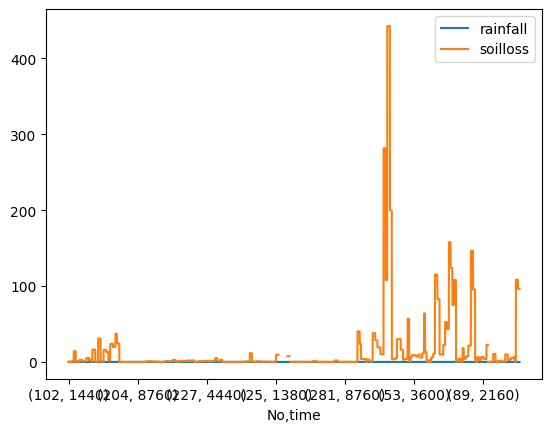

In [13]:
b.plot()

In [17]:
TUBAF = load_sp_datapackage({"sourcedir": "example_datasets/TUBAF/"}, 'TUBAF')
view_sp_resource(TUBAF.resources[0], fields = ['SigP'], row_filters = ['SigP >9', 'SigP < 12']).to_pandas()

get_dataset_concepts(TUBAF)
get_sp_data(TUBAF, fielddefinition=[{'name': 'SigP'}])
view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

view = get_sp_data(
    TUBAF,
    fielddefinition=[
        {'name': 'SigP',
         'row_filters': ['SigP > 10']
         },
        {'unit': 'g/l',
         'row_filters': ['not sedconc == None and sedconc >=300']
         }
        ]
    )


view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

try:
    view.extract()
except:
    view.extract()

# model requirements can be defined by row constraints
#from frictionless import validate, checks, transform
#validate(TUBAF.resources[0],
#         checks=[
#             checks.row_constraint(formula="fSi + mSi + cSi == SILT"),
#             checks.row_constraint(formula="fSa + mSa + cSa == SAND"),
#             checks.row_constraint(formula="SILT + SAND + CLAY == 100")
#             ]
#         )
TUBAF.resources[1].to_pandas().head()

runoffrate  sedconc  rainfall  plotwidth  plotlength  overflow
No time                                                                
1  0       0.000000      NaN  0.000000          2          22     False
   420     0.000005      NaN  0.000011          2          22     False
   480     0.000010      NaN  0.000011          2          22     False
   540     0.000010      NaN  0.000011          2          22     False
   600     0.000011      NaN  0.000011          2          22     False